# 📊 Marketing Campaign Analysis

**Step 1: Load and Explore the Data**

In [1]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the dataset
url = 'https://raw.githubusercontent.com/mahajanom10/marketing-campaign-analysis/main/data/bank-additional-full.csv'
df = pd.read_csv(url, sep=';')

# Display first few rows
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [3]:
# Basic info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

Check missing values and basic statistics of numeric columns


In [4]:
# Check for missing values
df.isnull().sum()
# Get basic statistics of numeric columns
df.describe()


,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


Check unique values for categorical features

In [5]:
# View unique values in object (categorical) columns
for col in df.select_dtypes(include='object').columns:
    print(f"{col}: {df[col].unique()[:10]}")  # showing first 10 unique values


job: ['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown']
marital: ['married' 'single' 'divorced' 'unknown']
education: ['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'unknown' 'university.degree' 'illiterate']
default: ['no' 'unknown' 'yes']
housing: ['no' 'yes' 'unknown']
loan: ['no' 'yes' 'unknown']
contact: ['telephone' 'cellular']
month: ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'mar' 'apr' 'sep']
day_of_week: ['mon' 'tue' 'wed' 'thu' 'fri']
poutcome: ['nonexistent' 'failure' 'success']
y: ['no' 'yes']


In [12]:
#Count of yes and no

df['y'].value_counts()





,count
y,
no,36548
yes,4640


In [13]:
#Percentage of each class
df['y'].value_counts(normalize=True) * 100

,proportion
y,
no,88.734583
yes,11.265417


Visualizing Target Variable (y column)

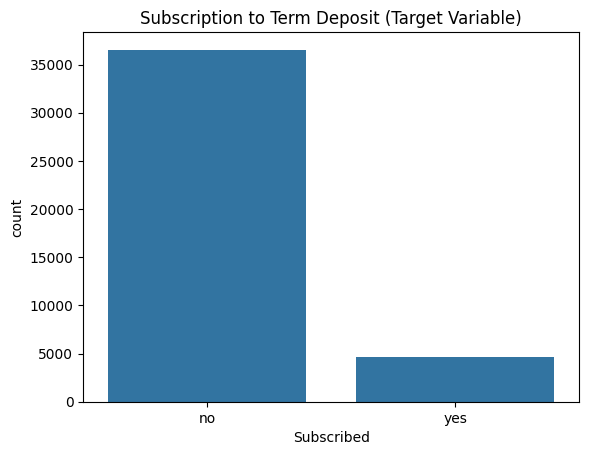

In [7]:
# Countplot for target variable
sns.countplot(data=df, x='y')
plt.xlabel("Subscribed")
plt.title("Subscription to Term Deposit (Target Variable)")
plt.show()


Numerical Variable Analysis

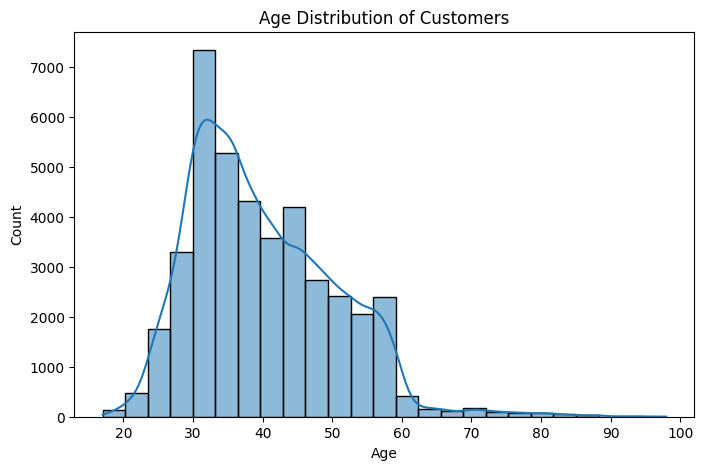

In [17]:
# Age
plt.figure(figsize=(8, 5))
sns.histplot(df['age'], bins=25, kde=True)
plt.title("Age Distribution of Customers")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()


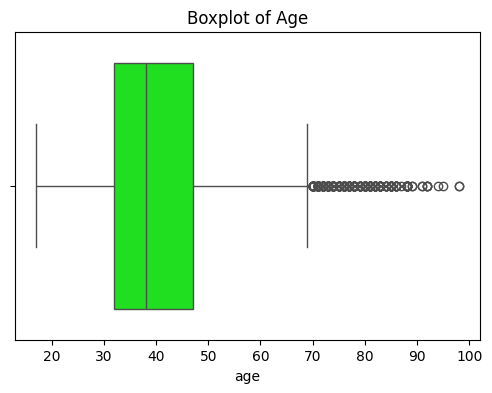

In [22]:
# Boxplot for age
plt.figure(figsize=(6, 4))
sns.boxplot(x=df['age'],color ='lime')
plt.title("Boxplot of Age")
plt.show()


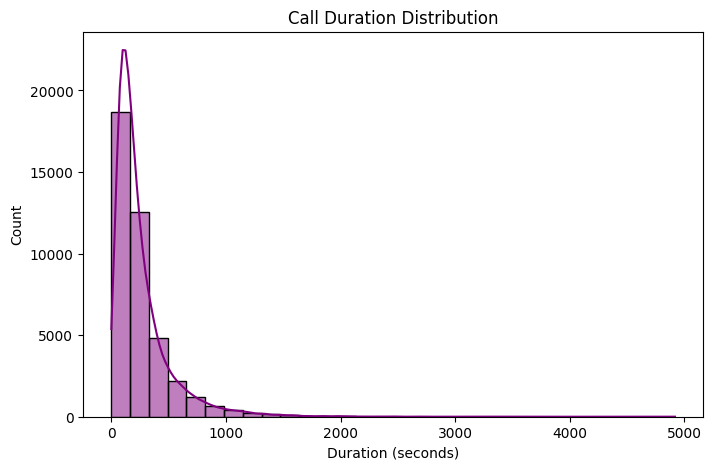

In [24]:
# Histogram for call duration
plt.figure(figsize=(8, 5))
sns.histplot(df['duration'], bins=30, kde=True, color='purple')
plt.title("Call Duration Distribution")
plt.xlabel("Duration (seconds)")
plt.ylabel("Count")
plt.show()


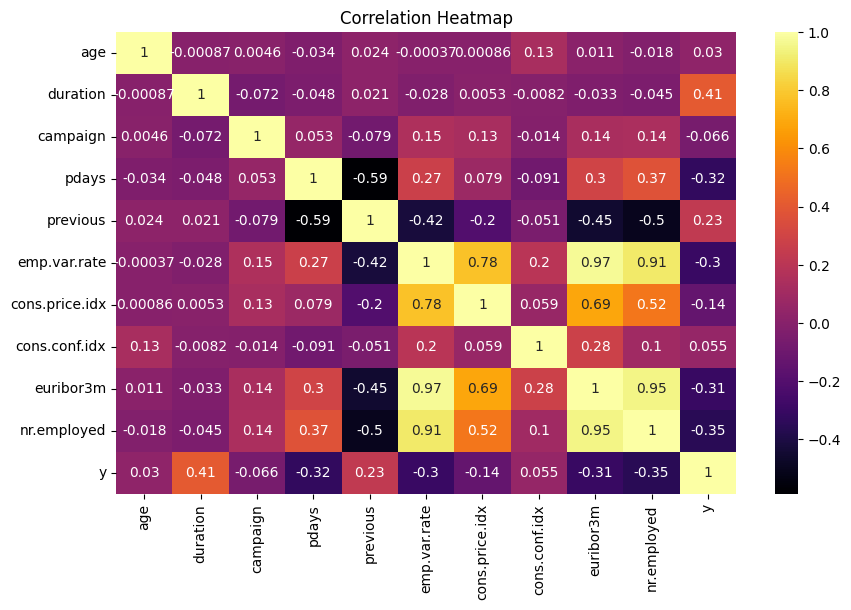

In [27]:
# Encode target for correlation analysis
df_temp = df.copy()
df_temp['y'] = df_temp['y'].map({'yes': 1, 'no': 0})

# Correlation heatmap for numerical columns
plt.figure(figsize=(10, 6))
sns.heatmap(df_temp.corr(numeric_only=True), annot=True, cmap='inferno')
plt.title("Correlation Heatmap")
plt.show()


**1.Job vs Subscription**



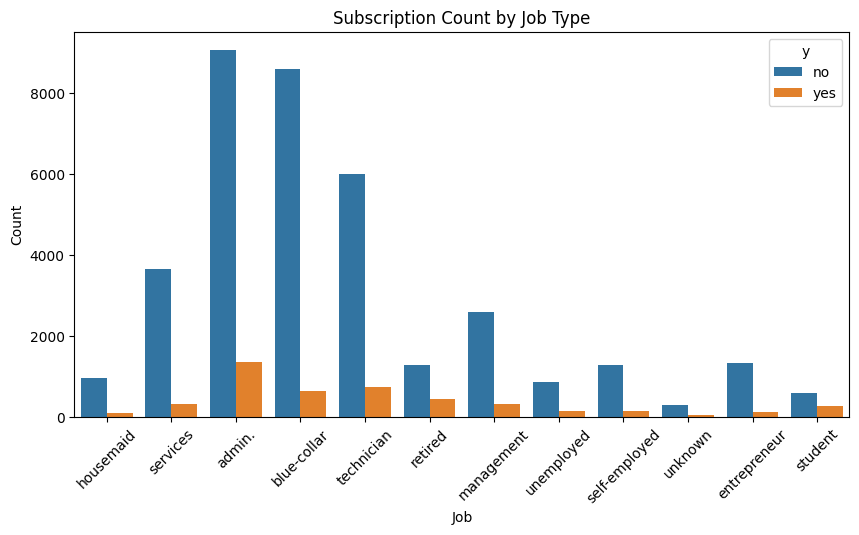

In [28]:
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='job', hue='y')
plt.title("Subscription Count by Job Type")
plt.xticks(rotation=45)
plt.ylabel("Count")
plt.xlabel("Job")
plt.show()


**2.Marital status vs. Subscription**

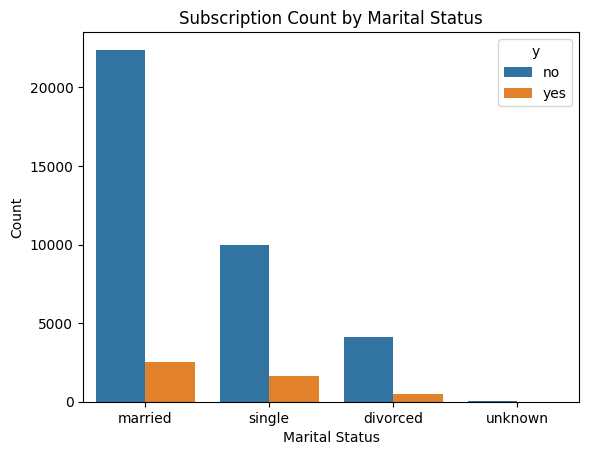

In [29]:
sns.countplot(data=df, x='marital', hue='y')
plt.title("Subscription Count by Marital Status")
plt.ylabel("Count")
plt.xlabel("Marital Status")
plt.show()


**3.Education vs Subscription**

In [ ]:
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='education', hue='y')
plt.title("Subscription Count by Education Level")
plt.xticks(rotation=45)
plt.ylabel("Count")
plt.xlabel("Education")
plt.show()


**4.Contact Method**

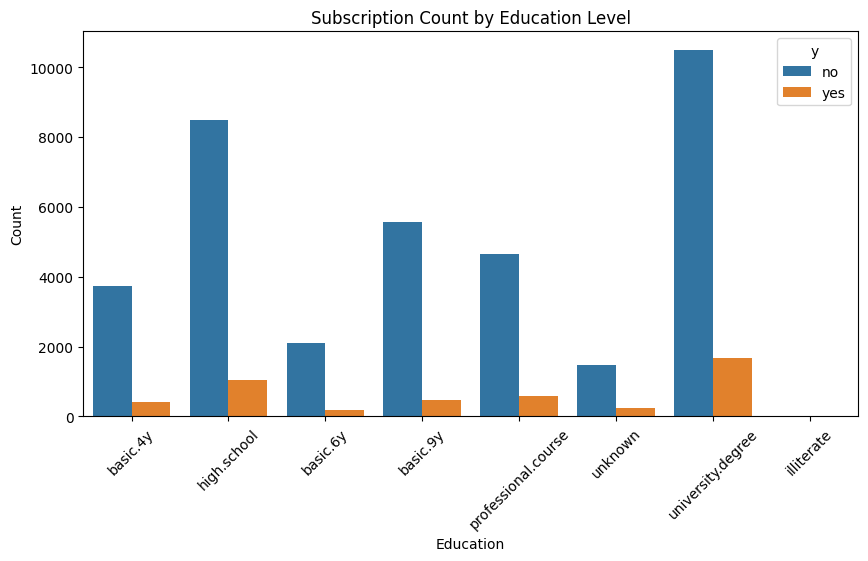

In [30]:
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='education', hue='y')
plt.title("Subscription Count by Education Level")
plt.xticks(rotation=45)
plt.ylabel("Count")
plt.xlabel("Education")
plt.show()


# Data Cleaning and Encoding

In [48]:
df_cleaned = df.copy()
#coverting yes and no to 0 and 1
df_cleaned['y'] = df_cleaned['y'].map({'yes': 1, 'no': 0})


In [49]:
#cleaning data
df_cleaned = df_cleaned.dropna()


In [50]:
#checking null values
df_cleaned.isnull().sum()


,0
age,0
job,0
marital,0
education,0
default,0
housing,0
loan,0
contact,0
month,0
day_of_week,0


In [51]:
# One-hot encode all categorical features
df_encoded = pd.get_dummies(df_cleaned, drop_first=True)
#coverting the categorical data in numeric data


In [52]:
#confirming the encoded data
print("Encoded Data Shape:", df_encoded.shape)
df_encoded.head()


Encoded Data Shape: (41188, 54)


,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,month_may,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,True,False,False,False,True,False,False,False,True,False
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,True,False,False,False,True,False,False,False,True,False
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,True,False,False,False,True,False,False,False,True,False
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,True,False,False,False,True,False,False,False,True,False
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,True,False,False,False,True,False,False,False,True,False


In [53]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


splitting data for train-test

In [54]:
# Separate features and target
X = df_encoded.drop('y', axis=1)
y = df_encoded['y']

# Train-test split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


Train Logistic Regression Model


In [73]:
from sklearn.preprocessing import StandardScaler

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the Logistic Regression model
logreg_model = LogisticRegression(max_iter=1000)
logreg_model.fit(X_train_scaled, y_train)


LogisticRegression(max_iter=1000)

Making Predictions

In [74]:
y_pred = log_model.predict(X_test)


In [75]:
#Model Evaluations
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.913814032532168

Confusion Matrix:
 [[7140  170]
 [ 540  388]]

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.98      0.95      7310
           1       0.70      0.42      0.52       928

    accuracy                           0.91      8238
   macro avg       0.81      0.70      0.74      8238
weighted avg       0.90      0.91      0.90      8238



***Training a Random Forest Model for comparison***

In [76]:
from sklearn.ensemble import RandomForestClassifier


In [77]:
#Create and Train the Model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [78]:
#Making Predictions
y_pred_rf = rf_model.predict(X_test)


In [79]:
#Model Evaluation
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))


Random Forest Accuracy: 0.915270696771061

Confusion Matrix:
 [[7088  222]
 [ 476  452]]

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.97      0.95      7310
           1       0.67      0.49      0.56       928

    accuracy                           0.92      8238
   macro avg       0.80      0.73      0.76      8238
weighted avg       0.91      0.92      0.91      8238



# Visualizing Model Performance

**1.ROC CURVE**

In [80]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

In [81]:
# Get probabilities for ROC
y_proba_rf = rf_model.predict_proba(X_test)[:, 1]

In [82]:
# Compute ROC
fpr, tpr, thresholds = roc_curve(y_test, y_proba_rf)
roc_auc = auc(fpr, tpr)

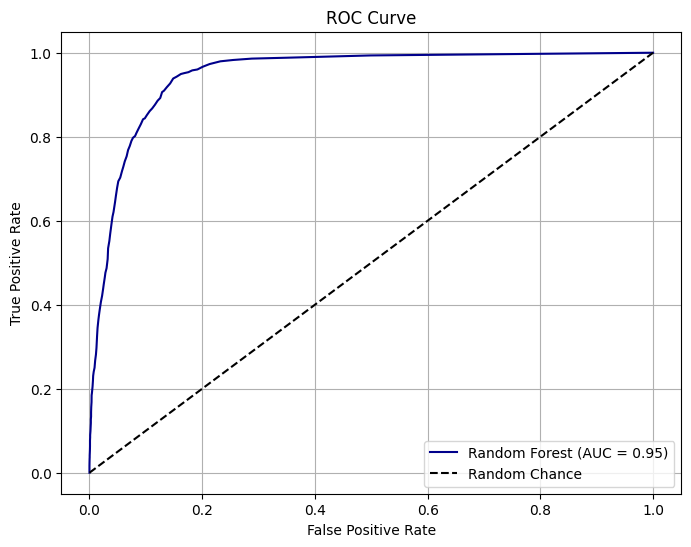

In [83]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'Random Forest (AUC = {roc_auc:.2f})', color='darkblue')
plt.plot([0, 1], [0, 1], 'k--', label='Random Chance')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()

**2.Feature Importance**

In [84]:
import pandas as pd
import numpy as np

In [85]:
# Get feature importances
importances = rf_model.feature_importances_
features = X_train.columns

In [86]:
# Create a DataFrame
feat_imp_df = pd.DataFrame({'Feature': features, 'Importance': importances})
feat_imp_df = feat_imp_df.sort_values(by='Importance', ascending=False).head(15)

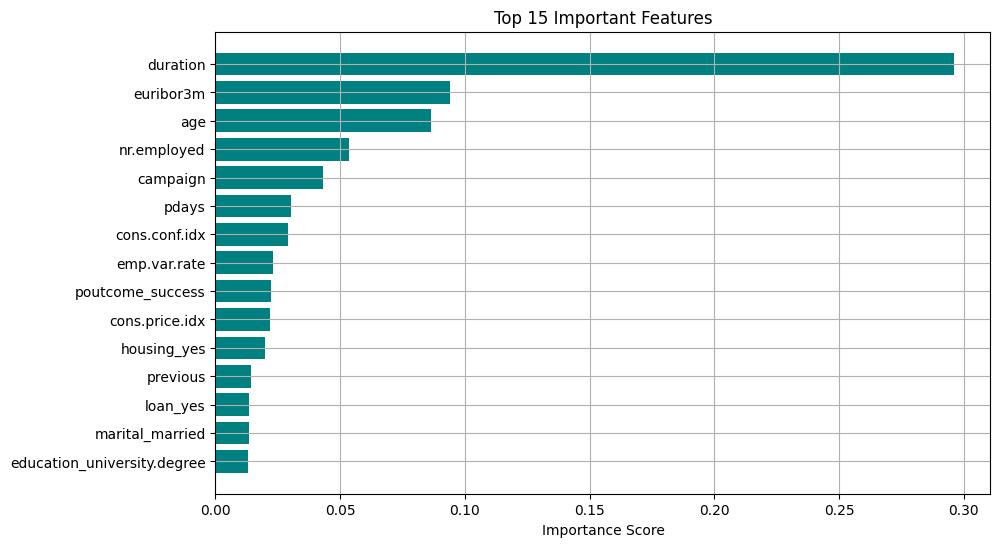

In [87]:
plt.figure(figsize=(10, 6))
plt.barh(feat_imp_df['Feature'], feat_imp_df['Importance'], color='teal')
plt.gca().invert_yaxis()
plt.title('Top 15 Important Features')
plt.xlabel('Importance Score')
plt.grid()
plt.show()